In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('births-and-deaths-projected-to-2100.csv')
df.head()

,Entity,Code,Year,Deaths - Sex: all - Age: all - Variant: estimates,Deaths - Sex: all - Age: all - Variant: medium,Births - Sex: all - Age: all - Variant: estimates,Births - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,290972.0,NaN,383985.0,NaN
1,Afghanistan,AFG,1951,288752.0,NaN,391002.0,NaN
2,Afghanistan,AFG,1952,288059.0,NaN,397663.0,NaN
3,Afghanistan,AFG,1953,287712.0,NaN,404666.0,NaN
4,Afghanistan,AFG,1954,289189.0,NaN,410428.0,NaN


In [52]:
df.tail(5)

,Entity,Code,Year,Deaths - Sex: all - Age: all - Variant: estimates,Deaths - Sex: all - Age: all - Variant: medium,Births - Sex: all - Age: all - Variant: estimates,Births - Sex: all - Age: all - Variant: medium
38651,Zimbabwe,ZWE,2096,NaN,339911.0,NaN,511066.0
38652,Zimbabwe,ZWE,2097,NaN,343328.0,NaN,508721.0
38653,Zimbabwe,ZWE,2098,NaN,346360.0,NaN,506437.0
38654,Zimbabwe,ZWE,2099,NaN,349346.0,NaN,503366.0
38655,Zimbabwe,ZWE,2100,NaN,352323.0,NaN,500347.0


### About Dataset

This dataset provides comprehensive global population dynamics data, spanning from 1950 to 2100. It includes historical estimates and medium-scenario projections from the United Nations World Population Prospects 2024 edition. Covering 237 countries or areas, this dataset offers researchers, policymakers, and data enthusiasts a valuable resource for analyzing long-term demographic trends and their potential impacts across a 150-year period.

- Key features of this dataset include:

* Annual birth and death figures for each country/area
* Historical estimates from 1950 to 2024
* Medium-scenario projections from 2024 to 2100
* Data for both sexes combined and all age groups
* Consistent methodology across countries for comparability

#### To better analyze the data, let’s split our DataFrame into two. 
* dfh - contains data about years 1950 - 2024
* dfe - contains estimated data about years 2024 - 2100

In [53]:
YEAR_CUT = 2023
dfh = df[df.Year <= YEAR_CUT]
dfe = df[df.Year > YEAR_CUT]

After division both dfh and dfe will contain columns of NaNs. Let's remove them and rename othr columns:

In [54]:
dfh = dfh.drop(["Deaths - Sex: all - Age: all - Variant: medium"], axis=1)
dfh = dfh.drop(["Births - Sex: all - Age: all - Variant: medium"], axis=1)

In [55]:
dfh = dfh.rename(columns={'Deaths - Sex: all - Age: all - Variant: estimates':'Deaths'})
dfh = dfh.rename(columns={'Births - Sex: all - Age: all - Variant: estimates':'Births'})

In [56]:
dfh

,Entity,Code,Year,Deaths,Births
0,Afghanistan,AFG,1950,290972.00,383985.0
1,Afghanistan,AFG,1951,288752.00,391002.0
2,Afghanistan,AFG,1952,288059.00,397663.0
3,Afghanistan,AFG,1953,287712.00,404666.0
4,Afghanistan,AFG,1954,289189.00,410428.0
...,...,...,...,...,...
38574,Zimbabwe,ZWE,2019,126467.99,475267.0
38575,Zimbabwe,ZWE,2020,126365.00,481152.0
38576,Zimbabwe,ZWE,2021,138738.00,488642.0
38577,Zimbabwe,ZWE,2022,124995.00,496240.0


In [57]:
dfe = dfe.drop(["Deaths - Sex: all - Age: all - Variant: estimates"], axis=1)
dfe = dfe.drop(["Births - Sex: all - Age: all - Variant: estimates"], axis=1)
dfe = dfe.rename(columns={'Deaths - Sex: all - Age: all - Variant: medium':'Deaths'})
dfe = dfe.rename(columns={'Births - Sex: all - Age: all - Variant: medium':'Births'})
dfe

,Entity,Code,Year,Deaths,Births
74,Afghanistan,AFG,2024,243181.98,1492956.0
75,Afghanistan,AFG,2025,245867.00,1507838.0
76,Afghanistan,AFG,2026,248524.00,1520756.0
77,Afghanistan,AFG,2027,251815.00,1539697.0
78,Afghanistan,AFG,2028,254756.00,1554635.0
...,...,...,...,...,...
38651,Zimbabwe,ZWE,2096,339911.00,511066.0
38652,Zimbabwe,ZWE,2097,343328.00,508721.0
38653,Zimbabwe,ZWE,2098,346360.00,506437.0
38654,Zimbabwe,ZWE,2099,349346.00,503366.0


### Some countries may not have all data in DataFrame. Let's find these countries, then drop them, and make additional check about NaNs.

In [58]:
contains_nan = np.isnan(dfh['Deaths'].values).any()
if contains_nan:
    print("В dfh столбце 'Deaths' есть NaNs.")
else:
    print("В dfh столбце 'Deaths' нет NaNs.")
contains_nan = np.isnan(dfh['Births'].values).any()
if contains_nan:
    print("В dfh столбце 'Births' есть NaNs.")
else:
    print("В dfh столбце 'Births' нет NaNs.")
contains_nan = np.isnan(dfe['Deaths'].values).any()
if contains_nan:
    print("В dfe столбце 'Deaths' есть NaNs.")
else:
    print("В dfe столбце 'Deaths' нет NaNs.")
contains_nan = np.isnan(dfe['Births'].values).any()
if contains_nan:
    print("В dfe столбце 'Births' есть NaNs.")
else:
    print("В dfe столбце 'Births' нет NaNs.")

В dfh столбце 'Deaths' нет NaNs.
В dfh столбце 'Births' есть NaNs.
В dfe столбце 'Deaths' нет NaNs.
В dfe столбце 'Births' есть NaNs.


Now we know that only Births columns contain NaN. We will delete all NaNs.

In [59]:
nan_rows = dfh[dfh['Births'].isna()]
print(nan_rows)
countries_to_remove = list(nan_rows['Entity'].unique())
print(countries_to_remove)
dfh = dfh[~dfh['Entity'].isin(countries_to_remove)]

                                      Entity Code  Year     Deaths  Births
755                            Americas (UN)  NaN  1950  4519355.0     NaN
756                            Americas (UN)  NaN  1951  4537971.0     NaN
757                            Americas (UN)  NaN  1952  4538478.0     NaN
758                            Americas (UN)  NaN  1953  4544200.0     NaN
759                            Americas (UN)  NaN  1954  4491792.0     NaN
...                                      ...  ...   ...        ...     ...
31930  Small island developing states (SIDS)  NaN  2019   527310.0     NaN
31931  Small island developing states (SIDS)  NaN  2020   553882.0     NaN
31932  Small island developing states (SIDS)  NaN  2021   650601.0     NaN
31933  Small island developing states (SIDS)  NaN  2022   557188.0     NaN
31934  Small island developing states (SIDS)  NaN  2023   549039.0     NaN

[222 rows x 5 columns]
['Americas (UN)', 'Land-locked developing countries (LLDC)', 'Small island d

In [60]:
nan_rows = dfh[dfh['Deaths'].isna()]
print(nan_rows)
nan_rows = dfh[dfh['Births'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []
Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []


Now we have deleted all NaNs from DataFrame dfh. We need to do the same with dfe DataFrame.

In [61]:
nan_rows = dfe[dfe['Births'].isna()]
print(nan_rows)
countries_to_remove = list(nan_rows['Entity'].unique())
print(countries_to_remove)
dfe = dfe[~dfe['Entity'].isin(countries_to_remove)]

                                      Entity Code  Year     Deaths  Births
829                            Americas (UN)  NaN  2024  7776605.0     NaN
830                            Americas (UN)  NaN  2025  7911113.0     NaN
831                            Americas (UN)  NaN  2026  8050526.0     NaN
832                            Americas (UN)  NaN  2027  8190337.0     NaN
833                            Americas (UN)  NaN  2028  8336675.0     NaN
...                                      ...  ...   ...        ...     ...
32007  Small island developing states (SIDS)  NaN  2096  1061647.0     NaN
32008  Small island developing states (SIDS)  NaN  2097  1058978.0     NaN
32009  Small island developing states (SIDS)  NaN  2098  1055801.0     NaN
32010  Small island developing states (SIDS)  NaN  2099  1052461.0     NaN
32011  Small island developing states (SIDS)  NaN  2100  1048636.0     NaN

[231 rows x 5 columns]
['Americas (UN)', 'Land-locked developing countries (LLDC)', 'Small island d

In [62]:
nan_rows = dfe[dfe['Deaths'].isna()]
print(nan_rows)
nan_rows = dfe[dfe['Births'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []
Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []


Now we have deleted all NaNs from DataFrame dfe.

There are some special countries, that have 0 deaths. For example Vatican. The Vatican is the smallest independent state in the world and residence of the spiritual leadership of the Roman Catholic Church. There is no need to keep such countries in DataFrame, because of their uniqueness, so let's drop them.

In [63]:
death = dfh[dfh.Deaths==0].Entity.unique()
dfh[dfh.Entity.isin(death)][['Deaths', 'Births', 'Entity']].groupby('Entity').sum()

,Deaths,Births
Entity,,
Tokelau,117.000000,3722.0
Vatican,42.000001,379.0


In [64]:
births = dfh[dfh.Births==0].Entity.unique()
dfh[dfh.Entity.isin(births)][['Deaths', 'Births', 'Entity']].groupby('Entity').sum()

,Deaths,Births
Entity,,


In [65]:
zero_rows = dfh[dfh['Deaths']==0]
print(zero_rows)

        Entity Code  Year  Deaths  Births
34630  Tokelau  TKL  2001     0.0    45.0
34633  Tokelau  TKL  2004     0.0    37.0
34634  Tokelau  TKL  2005     0.0    34.0
34635  Tokelau  TKL  2006     0.0    30.0
34636  Tokelau  TKL  2007     0.0    27.0
...        ...  ...   ...     ...     ...
37357  Vatican  VAT  2010     0.0     3.0
37358  Vatican  VAT  2011     0.0     3.0
37360  Vatican  VAT  2013     0.0     3.0
37361  Vatican  VAT  2014     0.0     3.0
37363  Vatican  VAT  2016     0.0     2.0

[82 rows x 5 columns]


In [66]:
countries_to_remove = list(zero_rows['Entity'].unique())
print(countries_to_remove)
dfh = dfh[~dfh['Entity'].isin(countries_to_remove)]

['Tokelau', 'Vatican']


In [67]:
death = dfe[dfe.Deaths==0].Entity.unique()
dfe[dfe.Entity.isin(death)][['Deaths', 'Births', 'Entity']].groupby('Entity').sum()

,Deaths,Births
Entity,,
Vatican,256.000005,416.0


In [68]:
births = dfe[dfe.Births==0].Entity.unique()
dfe[dfe.Entity.isin(births)][['Deaths', 'Births', 'Entity']].groupby('Entity').sum()

,Deaths,Births
Entity,,


In [69]:
zero_rows = dfe[dfe['Deaths']==0]
print(zero_rows)

        Entity Code  Year  Deaths  Births
37401  Vatican  VAT  2054     0.0     5.0
37402  Vatican  VAT  2055     0.0     5.0
37403  Vatican  VAT  2056     0.0     5.0
37404  Vatican  VAT  2057     0.0     5.0
37405  Vatican  VAT  2058     0.0     6.0
37406  Vatican  VAT  2059     0.0     6.0
37407  Vatican  VAT  2060     0.0     6.0
37408  Vatican  VAT  2061     0.0     6.0


In [70]:
countries_to_remove = list(zero_rows['Entity'].unique())
print(countries_to_remove)
dfe = dfe[~dfe['Entity'].isin(countries_to_remove)]

['Vatican']


In [71]:
zero_rows = dfh[dfh['Deaths']==0]
print(zero_rows)

Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []


In [72]:
zero_rows = dfe[dfe['Deaths']==0]
print(zero_rows)

Empty DataFrame
Columns: [Entity, Code, Year, Deaths, Births]
Index: []


We have deleted all rows with Vatican and Tokelau. 

#### Let's add new columns about Natural Increase to dfh and dfe.

In [73]:
dfh = dfh.assign(Natural_Increase = dfh['Births']-dfh['Deaths'])
print(dfh)

            Entity Code  Year     Deaths    Births  Natural_Increase
0      Afghanistan  AFG  1950  290972.00  383985.0          93013.00
1      Afghanistan  AFG  1951  288752.00  391002.0         102250.00
2      Afghanistan  AFG  1952  288059.00  397663.0         109604.00
3      Afghanistan  AFG  1953  287712.00  404666.0         116954.00
4      Afghanistan  AFG  1954  289189.00  410428.0         121239.00
...            ...  ...   ...        ...       ...               ...
38574     Zimbabwe  ZWE  2019  126467.99  475267.0         348799.01
38575     Zimbabwe  ZWE  2020  126365.00  481152.0         354787.00
38576     Zimbabwe  ZWE  2021  138738.00  488642.0         349904.00
38577     Zimbabwe  ZWE  2022  124995.00  496240.0         371245.00
38578     Zimbabwe  ZWE  2023  124411.99  496917.0         372505.01

[18574 rows x 6 columns]


In [74]:
sum_n_i = dfh['Natural_Increase'].sum()
print(sum_n_i)

37959059994.22143


Above is the sum of Natural Increase of all countries years 1950-2023.

In [75]:
dfe = dfe.assign(Natural_Increase = dfe['Births']-dfe['Deaths'])
print(dfe)

            Entity Code  Year     Deaths     Births  Natural_Increase
74     Afghanistan  AFG  2024  243181.98  1492956.0        1249774.02
75     Afghanistan  AFG  2025  245867.00  1507838.0        1261971.00
76     Afghanistan  AFG  2026  248524.00  1520756.0        1272232.00
77     Afghanistan  AFG  2027  251815.00  1539697.0        1287882.00
78     Afghanistan  AFG  2028  254756.00  1554635.0        1299879.00
...            ...  ...   ...        ...        ...               ...
38651     Zimbabwe  ZWE  2096  339911.00   511066.0         171155.00
38652     Zimbabwe  ZWE  2097  343328.00   508721.0         165393.00
38653     Zimbabwe  ZWE  2098  346360.00   506437.0         160077.00
38654     Zimbabwe  ZWE  2099  349346.00   503366.0         154020.00
38655     Zimbabwe  ZWE  2100  352323.00   500347.0         148024.00

[19404 rows x 6 columns]


In [76]:
sum_n_i_e = dfe['Natural_Increase'].sum()
print(sum_n_i_e)

15750690487.211313


Above is the sum of Natural Increase of all countries years 2024-2100.

In [77]:
print(sum_n_i/sum_n_i_e)

2.409993392038405


As we can see, the grows of population of the whole world will decrese.

#### Let us look in more details. We willtake some countries of Asia, Africa, Europe. 

The EU countries are: Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain and Sweden.

In [78]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
sum_eu_countries = dfh[dfh['Entity'].isin(eu_countries)]['Natural_Increase'].sum()
print(sum_eu_countries/27)
sum_eu_countries_e = dfe[dfe['Entity'].isin(eu_countries)]['Natural_Increase'].sum()
print(sum_eu_countries_e/27)
print((sum_eu_countries/27) + (sum_eu_countries_e/27))

3219109.5670851856
-5119726.532292593
-1900616.9652074077


As we see, grows of population of European Union countries is predicted to fall down. We can even notice that it is predicted that in the next 77 and the last 73 years the sum of grows will be less than 0 (<0), wich means that Eropean Union members need to take actions immideately if they want to survive.

Now let us look at China in more details. I will also show, on the example of China, that with the help of this data frame we can show, how global events affect population.

In [79]:
print(dfh[dfh['Entity']=='China'])

     Entity Code  Year      Deaths      Births  Natural_Increase
6795  China  CHN  1950  12564023.0  22293376.0         9729353.0
6796  China  CHN  1951  12411701.0  22144814.0         9733113.0
6797  China  CHN  1952  12459848.0  25496318.0        13036470.0
6798  China  CHN  1953  12309525.0  24139414.0        11829889.0
6799  China  CHN  1954  12145578.0  25438542.0        13292964.0
...     ...  ...   ...         ...         ...               ...
6864  China  CHN  2019  10128803.0  14615866.0         4487063.0
6865  China  CHN  2020  10411387.0  11843469.0         1432082.0
6866  China  CHN  2021  10759523.0  10461124.0         -298399.0
6867  China  CHN  2022  10998724.0   9455320.0        -1543404.0
6868  China  CHN  2023  11684178.0   8899881.0        -2784297.0

[74 rows x 6 columns]


In [80]:
print(dfe[dfe['Entity']=='China'])

     Entity Code  Year      Deaths     Births  Natural_Increase
6869  China  CHN  2024  11678348.0  8822056.0        -2856292.0
6870  China  CHN  2025  11716328.0  8709352.0        -3006976.0
6871  China  CHN  2026  11482042.0  8625232.0        -2856810.0
6872  China  CHN  2027  11697064.0  8530091.0        -3166973.0
6873  China  CHN  2028  11931436.0  8459285.0        -3472151.0
...     ...  ...   ...         ...        ...               ...
6941  China  CHN  2096  14043346.0  3128414.0       -10914932.0
6942  China  CHN  2097  13941769.0  3120410.0       -10821359.0
6943  China  CHN  2098  13848117.0  3111630.0       -10736487.0
6944  China  CHN  2099  13753666.0  3109207.0       -10644459.0
6945  China  CHN  2100  13655445.0  3099844.0       -10555601.0

[77 rows x 6 columns]


* Three major events for China, which are reflected in birth and death statistics, are: 
1) 1979 - the start of "one child in a family" program
2) 2020 - Covid19 starts
3) 2015 - the end of "one child in a family" program

In [81]:
import matplotlib.pyplot as plt
years1 = [1978, 1979, 1980, 1981, 1982, 1983]
data = dfh[(dfh['Code'] == 'CHN') & (dfh.Year.isin(years1))]['Births']
plt.plot(years1, data)
plt.title('Births in China (1978-1983) one child in a family 1979')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

As we see, the program was intoduced in 1979, then in 1982 started the fall of Births

In [82]:
years2 = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
data = dfh[(dfh['Entity']=='China') & (dfh.Year.isin(years2))]['Deaths']
plt.title('Deaths in China (2012 - 2023) Covid time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.plot(years2, data)
plt.show()

Covid started in 2020, and as we can see the number of Deaths really increased.

In [83]:
years3 = [2014, 2015, 2016, 2017]
data = dfh[(dfh['Entity']=='China') & (dfh.Year.isin(years3))]['Births']
plt.plot(years3, data)
plt.title('Deaths in China (2013 - 2017) 2015 - the end of "one child in a family"')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

By time 2013-2014 there was a decrease in Births, but the end of "one child" program led to increase of Births

In [84]:
sum_china = dfh[dfh['Entity']=='China']['Natural_Increase'].sum()
print(sum_china)
sum_china_e = dfe[dfe['Entity']=='China']['Natural_Increase'].sum()
print(sum_china_e)
print(sum_china_e + sum_china)

896702246.0
-780794624.0
115907622.0


As we see, the grows of population in China will decrease, but still China has better situation than EU members.

Now we are going to look at other counties. Russia:

In [85]:
sum_russia = dfh[dfh['Entity']=='Russia']['Natural_Increase'].sum()
print(sum_russia)
sum_russia_e = dfe[dfe['Entity']=='Russia']['Natural_Increase'].sum()
print(sum_russia_e)
print(sum_russia + sum_russia_e)

30847327.16
-41376596.8
-10529269.639999997


In [86]:
import matplotlib.pyplot as plt
years = dfh[(dfh['Entity']=='Russia')]['Year']
data = dfh[(dfh['Entity']=='Russia')]['Natural_Increase']
plt.plot(years, data)
plt.title('Natural Increase in Russia 1950-2023')
plt.xlabel('Year')
plt.ylabel('Natural Increase')
plt.show()

In [87]:
import matplotlib.pyplot as plt
years = dfe[(dfe['Entity']=='Russia')]['Year']
data = dfe[(dfe['Entity']=='Russia')]['Natural_Increase']
plt.plot(years, data)
plt.title('Natural Increase in Russia 2024-2100')
plt.xlabel('Year')
plt.ylabel('Natural Increase')
plt.show()

In [88]:
dfe[dfe['Entity']=='Russia']

,Entity,Code,Year,Deaths,Births,Natural_Increase
28764,Russia,RUS,2024,1862624.0,1270354.0,-592270.0
28765,Russia,RUS,2025,1865748.0,1241824.0,-623924.0
28766,Russia,RUS,2026,1868411.0,1213374.0,-655037.0
28767,Russia,RUS,2027,1872757.9,1200192.0,-672565.9
28768,Russia,RUS,2028,1879905.0,1190950.0,-688955.0
...,...,...,...,...,...,...
28836,Russia,RUS,2096,1508040.0,1149823.0,-358217.0
28837,Russia,RUS,2097,1517123.0,1152775.0,-364348.0
28838,Russia,RUS,2098,1526117.0,1157466.0,-368651.0
28839,Russia,RUS,2099,1536011.0,1160454.0,-375557.0


* Russia's population is also predicted to be decreasing.

In [89]:
africa_countries = ['Algeria', 'Egypt', 'Sudan', 'Nigerea', 'Ethiopia', 'Uganda', 'Kenya', 'Tanzania', 'South Africa']
sum_africa_countries = dfh[dfh['Entity'].isin(africa_countries)]['Natural_Increase'].sum()
print(sum_africa_countries/9)
sum_africa_countries_e = dfe[dfe['Entity'].isin(africa_countries)]['Natural_Increase'].sum()
print(sum_africa_countries_e/9)
print((sum_africa_countries/9) + (sum_africa_countries_e/9))

55400904.02555555
87866191.46
143267095.48555553


On the contrary, Africa's countries population is predicted to be increasing.

## * Now, let us look globaly. We will take a look on continents. I have found a data frame with countries and their continent codes. We saw that until 2023 most countries' natural increase was growing, the population was growing too. Afterwards Natural Increase for most of them will decrese and then will be less than 0, so population will start to decrease decreasing. 
## * Main assumption, that I want to prove: Let us show on plots that human population is predicted to start decreasing in about 50-60 years time after 2023 (and also find aproximate year of decrease to start). 

### Each continent has its own code:
* AF - Africa
* AN - Antarctic
* AS - Asia
* EU - Europe
* NA - North America
* OC - Oceania
* SA - South America

Let's use DataFrame which contains information about countries, their codes and their continents codes:

In [90]:
df = pd.read_csv('convertcsv.csv', index_col=2)
df.fillna("NA", inplace=True)
df.head()

,CC,a-2,#,Name
a-3,,,,
ZWE,AF,ZW,716.0,Zimbabwe Republic of
ZMB,AF,ZM,894.0,Zambia Republic of
YEM,AS,YE,887.0,Yemen
WLF,OC,WF,876.0,Wallis and Futuna
VNM,AS,VN,704.0,Vietnam Socialist Republic of


In [91]:
df.loc["MEX"]

CC                                NA
a-2                               MX
#                              484.0
Name    Mexico United Mexican States
Name: MEX, dtype: object

Yemen country code is YEM and DataFrame returned AS wich is the right continent code, where the country is located.

These two: "OWID_KOS" and "OWID_WRL" are not in df, so we will delete these rows.

In [92]:
countries_to_remove = ['OWID_KOS', 'OWID_WRL']
dfh = dfh[~dfh['Code'].isin(countries_to_remove)]

In [93]:
l = dfh.Code.apply(lambda x: df.loc[x,"CC"])
dfh = dfh.assign(Continent_Code = l)

Now we are going to work with data we know, not predicted -> dfh

In [94]:
not_asia = ['AF', 'AN', 'EU', 'NA', 'OC', 'SA']
asia = dfh[~dfh['Continent_Code'].isin(not_asia)]
asia

,Entity,Code,Year,Deaths,Births,Natural_Increase,Continent_Code
0,Afghanistan,AFG,1950,290972.0,383985.0,93013.0,AS
1,Afghanistan,AFG,1951,288752.0,391002.0,102250.0,AS
2,Afghanistan,AFG,1952,288059.0,397663.0,109604.0,AS
3,Afghanistan,AFG,1953,287712.0,404666.0,116954.0,AS
4,Afghanistan,AFG,1954,289189.0,410428.0,121239.0,AS
...,...,...,...,...,...,...,...
38272,Yemen,YEM,2019,205722.0,1262154.0,1056432.0,AS
38273,Yemen,YEM,2020,210719.0,1297064.0,1086345.0,AS
38274,Yemen,YEM,2021,221116.0,1324728.0,1103612.0,AS
38275,Yemen,YEM,2022,199983.0,1353356.0,1153373.0,AS


In [95]:
asia = asia[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
asia

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
1950,2.427084e+08,4.553394e+08,2.126310e+08
1951,2.405711e+08,4.594492e+08,2.188781e+08
1952,2.367841e+08,4.847701e+08,2.479860e+08
1953,2.361545e+08,4.854037e+08,2.492493e+08
1954,2.335404e+08,5.006608e+08,2.671204e+08
...,...,...,...
2019,2.869991e+08,7.253349e+08,4.383358e+08
2020,3.116782e+08,7.058300e+08,3.941518e+08


In [96]:
not_europe = ['AF', 'AN', 'AS', 'NA', 'OC', 'SA']
europe = dfh[~dfh['Continent_Code'].isin(not_europe)]
europe = europe[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
europe

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
1950,2.179174e+08,4.104081e+08,1.924907e+08
1951,2.164392e+08,4.142075e+08,1.977683e+08
1952,2.128623e+08,4.352008e+08,2.223386e+08
1953,2.123073e+08,4.363331e+08,2.240258e+08
1954,2.099478e+08,4.493751e+08,2.394273e+08
...,...,...,...
2019,2.635399e+08,6.597345e+08,3.961947e+08
2020,2.870176e+08,6.437079e+08,3.566903e+08


In [97]:
not_sa = ['AF', 'AN', 'AS', 'NA', 'OC', 'EU']
sa = dfh[~dfh['Continent_Code'].isin(not_sa)]
sa = sa[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])

In [98]:
not_na = ['AF', 'AN', 'AS', 'SA', 'OC', 'EU']
na = dfh[~dfh['Continent_Code'].isin(not_na)]
na = na[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])

In [99]:
not_oceania = ['AF', 'AN', 'AS', 'SA', 'NA', 'EU']
oceania = dfh[~dfh['Continent_Code'].isin(not_oceania)]
oceania = oceania[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])

While working on antartic it was found that only one row is really AN Antartic region: 
   * AN,AQ,ATA,010,Antarctica (the territory South of 60 deg S)
But the first main dataset does not have Antartic, so we will not look at Antartic

In [100]:
not_africa = ['AN', 'OC', 'AS', 'SA', 'NA', 'EU']
africa = dfh[~dfh['Continent_Code'].isin(not_africa)]
africa = africa[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
africa

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
1950,2.176011e+08,4.091536e+08,1.915524e+08
1951,2.159851e+08,4.133155e+08,1.973304e+08
1952,2.127423e+08,4.345856e+08,2.218433e+08
1953,2.122765e+08,4.360462e+08,2.237697e+08
1954,2.101372e+08,4.492936e+08,2.391564e+08
...,...,...,...
2019,2.665405e+08,6.965954e+08,4.300549e+08
2020,2.893565e+08,6.811557e+08,3.917992e+08


The plot will show the change in Natural Increase on continents through years 1950-2023.

In [101]:
plt = None

<IPython.core.display.Javascript object>


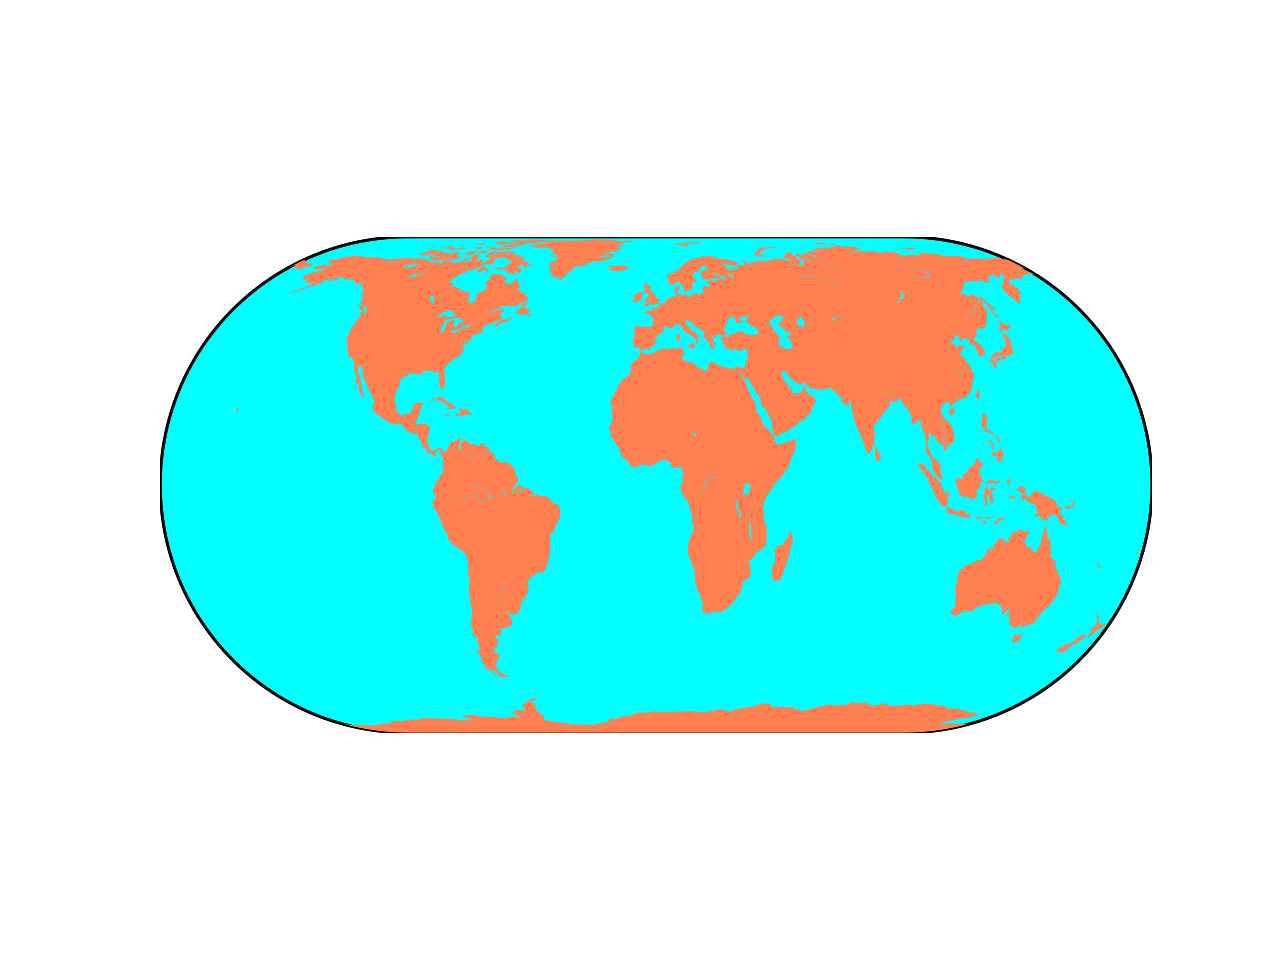

In [116]:
%matplotlib notebook
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

m = Basemap(projection='eck4', lon_0=0, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawparallels(np.arange(-90., 120., 30.))
m.drawmeridians(np.arange(0., 360., 60.))
m.drawmapboundary(fill_color='aqua') 

data = {
    'lat': [45, 50, -25, 20, -10, 20],  # Широта
    'lon': [-105, 45, 135, 15, -60, 105],  # Долгота
    'size': [0, 0, 0, 0, 0, 0],
    'colors': ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'magenta']
}

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    m.drawcoastlines()
    m.fillcontinents(color='coral', lake_color='aqua')
    m.drawparallels(np.arange(-90., 120., 30.))
    m.drawmeridians(np.arange(0., 360., 60.))
    m.drawmapboundary(fill_color='aqua') 
    
    plt.title(f"Natural Increase Changes in {frame}")

    sizes = [0] * len(data['size'])

    sizes[0] = (na.loc[frame, ('Natural_Increase', 'sum')])/50000
    sizes[1] = (europe.loc[frame, ('Natural_Increase', 'sum')])/50000
    sizes[2] = (oceania.loc[frame, ('Natural_Increase', 'sum')])/50000
    sizes[3] = (africa.loc[frame, ('Natural_Increase', 'sum')])/50000
    sizes[4] = (sa.loc[frame, ('Natural_Increase', 'sum')])/50000
    sizes[5] = (asia.loc[frame, ('Natural_Increase', 'sum')])/50000

    for i, (lat, lon) in enumerate(zip(data['lat'], data['lon'])):
        x, y = m(lon, lat)
        m.scatter(x, y, s=sizes[i], color=data['colors'][i], alpha=1)
        
        plt.text(x, y, f'{sizes[i]*50000:.1f}', ha='center', va='center', fontsize=10, color='black')

years = list(range(1950, 2024))

ani = FuncAnimation(fig, update, frames=years, interval=1, repeat=True)
plt.show()

In [103]:
plt = None

Now let us look on predicted data -> dfe

In [104]:
countries_to_remove = ['OWID_KOS', 'OWID_WRL']
dfe = dfe[~dfe['Code'].isin(countries_to_remove)]

In [105]:
l = dfe.Code.apply(lambda x: df.loc[x,"CC"])
dfe = dfe.assign(Continent_Code = l)
dfe

,Entity,Code,Year,Deaths,Births,Natural_Increase,Continent_Code
74,Afghanistan,AFG,2024,243181.98,1492956.0,1249774.02,AS
75,Afghanistan,AFG,2025,245867.00,1507838.0,1261971.00,AS
76,Afghanistan,AFG,2026,248524.00,1520756.0,1272232.00,AS
77,Afghanistan,AFG,2027,251815.00,1539697.0,1287882.00,AS
78,Afghanistan,AFG,2028,254756.00,1554635.0,1299879.00,AS
...,...,...,...,...,...,...,...
38651,Zimbabwe,ZWE,2096,339911.00,511066.0,171155.00,AF
38652,Zimbabwe,ZWE,2097,343328.00,508721.0,165393.00,AF
38653,Zimbabwe,ZWE,2098,346360.00,506437.0,160077.00,AF
38654,Zimbabwe,ZWE,2099,349346.00,503366.0,154020.00,AF


In [106]:
not_asia = ['AF', 'AN', 'EU', 'NA', 'OC', 'SA']
asia2 = dfe[~dfe['Continent_Code'].isin(not_asia)]
asia2 = asia2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
asia2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.666977e+08,6.476150e+08,8.091732e+07
2072,5.709712e+08,6.455561e+08,7.458487e+07
2073,5.750549e+08,6.434306e+08,6.837570e+07
2074,5.791378e+08,6.410982e+08,6.196040e+07
2075,5.831998e+08,6.386624e+08,5.546255e+07
2076,5.871677e+08,6.361735e+08,4.900581e+07
2077,5.910038e+08,6.335162e+08,4.251241e+07
2078,5.946742e+08,6.305218e+08,3.584768e+07


In Asia Natural Increase will be less than 0 after 2084.

In [107]:
not_europe = ['AF', 'AN', 'AS', 'NA', 'OC', 'SA']
europe2 = dfe[~dfe['Continent_Code'].isin(not_europe)]
europe2 = europe2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
europe2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.131896e+08,6.018564e+08,8.866684e+07
2072,5.171047e+08,6.000911e+08,8.298642e+07
2073,5.208533e+08,5.982590e+08,7.740573e+07
2074,5.246050e+08,5.962316e+08,7.162659e+07
2075,5.283279e+08,5.941050e+08,6.577709e+07
2076,5.319692e+08,5.919328e+08,5.996358e+07
2077,5.354994e+08,5.896005e+08,5.410111e+07
2078,5.388774e+08,5.869604e+08,4.808298e+07


In Europe Natural Increase will be less than 0 after 2088.

In [108]:
not_sa = ['AF', 'AN', 'AS', 'NA', 'OC', 'EU']
sa2 = dfe[~dfe['Continent_Code'].isin(not_sa)]
sa2 = sa2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
sa2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.099424e+08,6.002647e+08,9.032232e+07
2072,5.139433e+08,5.984595e+08,8.451626e+07
2073,5.177750e+08,5.965856e+08,7.881053e+07
2074,5.216111e+08,5.945254e+08,7.291431e+07
2075,5.254173e+08,5.923741e+08,6.695677e+07
2076,5.291437e+08,5.901778e+08,6.103410e+07
2077,5.327599e+08,5.878237e+08,5.506378e+07
2078,5.362215e+08,5.851708e+08,4.894929e+07


In South America Natural Increase will be less than 0 after 2087.

In [109]:
not_na = ['AF', 'AN', 'AS', 'SA', 'OC', 'EU']
na2 = dfe[~dfe['Continent_Code'].isin(not_na)]
na2 = na2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
na2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.119576e+08,6.032501e+08,9.129253e+07
2072,5.159774e+08,6.014596e+08,8.548219e+07
2073,5.198323e+08,5.995961e+08,7.976383e+07
2074,5.236907e+08,5.975465e+08,7.385580e+07
2075,5.275260e+08,5.954058e+08,6.787973e+07
2076,5.312816e+08,5.932195e+08,6.193788e+07
2077,5.349261e+08,5.908795e+08,5.595333e+07
2078,5.384115e+08,5.882379e+08,4.982646e+07


In North America Natural Increase will be less than 0 after 2087.

In [110]:
not_oceania = ['AF', 'AN', 'AS', 'SA', 'NA', 'EU']
oceania2 = dfe[~dfe['Continent_Code'].isin(not_oceania)]
oceania2 = oceania2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
oceania2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.049260e+08,5.971190e+08,9.219295e+07
2072,5.089008e+08,5.953423e+08,8.644148e+07
2073,5.127119e+08,5.934997e+08,8.078779e+07
2074,5.165279e+08,5.914684e+08,7.494050e+07
2075,5.203187e+08,5.893465e+08,6.902787e+07
2076,5.240309e+08,5.871807e+08,6.314982e+07
2077,5.276357e+08,5.848600e+08,5.722427e+07
2078,5.310893e+08,5.822410e+08,5.115166e+07


In Oceania Natural Increase will be less than 0 after 2088.

In [111]:
not_africa = ['AN', 'OC', 'AS', 'SA', 'NA', 'EU']
africa2 = dfe[~dfe['Continent_Code'].isin(not_africa)]
africa2 = africa2[['Year', 'Deaths', 'Births', 'Natural_Increase']].groupby(by='Year').agg(['sum'])
africa2.tail(30)

,Deaths,Births,Natural_Increase
,sum,sum,sum
Year,,,
2071,5.298561e+08,6.528414e+08,1.229852e+08
2072,5.342466e+08,6.510212e+08,1.167746e+08
2073,5.384783e+08,6.491330e+08,1.106547e+08
2074,5.427210e+08,6.470307e+08,1.043098e+08
2075,5.469384e+08,6.448363e+08,9.789791e+07
2076,5.510817e+08,6.425982e+08,9.151652e+07
2077,5.551275e+08,6.401898e+08,8.506224e+07
2078,5.590166e+08,6.374682e+08,7.845156e+07


In Africa Natural Increase will be less than 0 after 2092.

### Now we will find aproximate year, when population will start to decrease.

In [112]:
decrease_year = (2092 + 2088 + 2087 + 2084 + 2087 + 2088)/6
decrease_year

2087.6666666666665

<IPython.core.display.Javascript object>


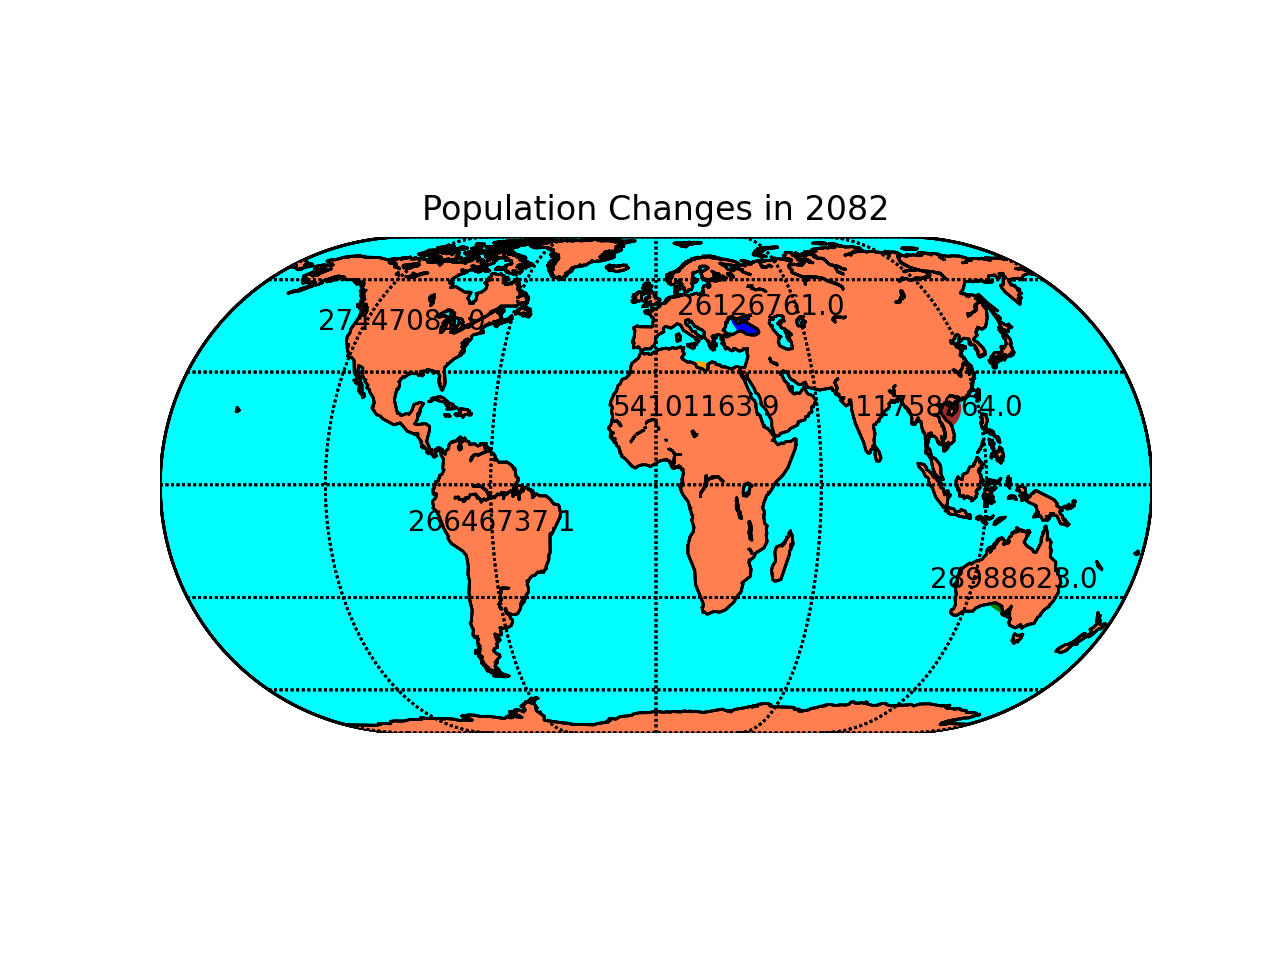

In [114]:
%matplotlib notebook
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

m = Basemap(projection='eck4', lon_0=0, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawparallels(np.arange(-90., 120., 30.))
m.drawmeridians(np.arange(0., 360., 60.))
m.drawmapboundary(fill_color='aqua') 

data = {
    'lat': [45, 50, -25, 20, -10, 20],  # Широта
    'lon': [-105, 45, 135, 15, -60, 105],  # Долгота
    'size': [0, 0, 0, 0, 0, 0],
    'colors': ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'magenta']
}

fig, ax = plt.subplots()

# Функция обновления для анимации
def update(frame):
    ax.clear()
    m.drawcoastlines()
    m.fillcontinents(color='coral', lake_color='aqua')
    m.drawparallels(np.arange(-90., 120., 30.))
    m.drawmeridians(np.arange(0., 360., 60.))
    m.drawmapboundary(fill_color='aqua') 
    
    plt.title(f"Natural Increase Changes in {frame}")

    sizes = [0] * len(data['size'])

    if sizes[0] >= 0:
        sizes[0] = (na2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[0] = 100
    if sizes[1] >= 0:
        sizes[1] = (europe2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[1] = 100
    if sizes[2] >= 0:
        sizes[2] = (oceania2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[2] = 100
    if sizes[3] >= 0:
        sizes[3] = (africa2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[3] = 100
    if sizes[4] >= 0:
        sizes[4] = (sa2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[4] = 100
    if sizes[5] >= 0:
        sizes[5] = (asia2.loc[frame, ('Natural_Increase', 'sum')])/50000
    else:
        sizes[5] = 100

    for i, (lat, lon) in enumerate(zip(data['lat'], data['lon'])):
        x, y = m(lon, lat)
        m.scatter(x, y, s=sizes[i], color=data['colors'][i], alpha=1)

        plt.text(x, y, f'{sizes[i]*50000:.1f}', ha='center', va='center', fontsize=10, color='black')
        
years = list(range(2024, 2101))

ani = FuncAnimation(fig, update, frames=years, interval=300, repeat=True)
plt.show()

## The plots confirm my idea. Natural Increase mostly grows util 2023, then Natural Increase is predicted to decrease, but still population is growing, slowlier, but growing. And only at about 2088 year the population will start to decrease.